# Heart Disease Assessment Exploratory Data Analysis (EDA)

### 1. Import Relevant Libraries/Packages

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

### 2. Load Dataset and Explore Dataset

In [30]:
df = pd.read_csv('data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [33]:
df.describe(include='object').transpose()

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [34]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [35]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [36]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [38]:
# top 5 patients with highest cholestrol level
df.nlargest(5, 'Cholesterol')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1


In [39]:
# top 5 patients with highest age
df.nlargest(5, 'Age')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
447,77,M,ASY,124,171,0,ST,110,Y,2.0,Up,1
814,77,M,ASY,125,304,0,LVH,162,Y,0.0,Up,1
541,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1
688,76,F,NAP,140,197,0,ST,116,N,1.1,Flat,0
491,75,M,ASY,170,203,1,ST,108,N,0.0,Flat,1


In [40]:
# top 5 patients with lowest age
df.nsmallest(5, 'Age')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
208,28,M,ATA,130,132,0,LVH,185,N,0.0,Up,0
170,29,M,ATA,120,243,0,Normal,160,N,0.0,Up,0
219,29,M,ATA,140,263,0,Normal,170,N,0.0,Up,0
829,29,M,ATA,130,204,0,LVH,202,N,0.0,Up,0
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0


In [41]:
# top 5 patients with highest resting blood pressure
df.nlargest(5, 'RestingBP')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [42]:
# top 5 patients with highest max heart rate
df.nlargest(5, 'MaxHR')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
829,29,M,ATA,130,204,0,LVH,202,N,0.0,Up,0
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
753,34,F,ATA,118,210,0,Normal,192,N,0.7,Up,0
126,34,F,ATA,130,161,0,Normal,190,N,0.0,Up,0


In [43]:
# top 5 patients with highest ST depression
df.nlargest(5, 'Oldpeak')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0


#### Conclusions: Data Exploration
1. The dataset contains 918 records and 12 columns.
2. There are no missing values in the dataset.
3. There are no duplicate records in the dataset.
4. Patients who had high cholestrol level they mostly suffered from Heart Disease.
4. Patients who had age >= 75 (approx.), they mostly suffered from Heart Disease.
5. Patients who had age <= 31 or 32 (approx.), they mostly don't suffered from Heart Disease.
6. Patients who had high resting blood pressure they almost suffered from Heart Disease.
7. Patients with max heart rate doesn't suffered from Heart Disease.
8. Patients with high ST depression (Oldpeak) suffered from Heart Disease.

### 3. Exploratory Data Analysis (EDA)/Data Visualization

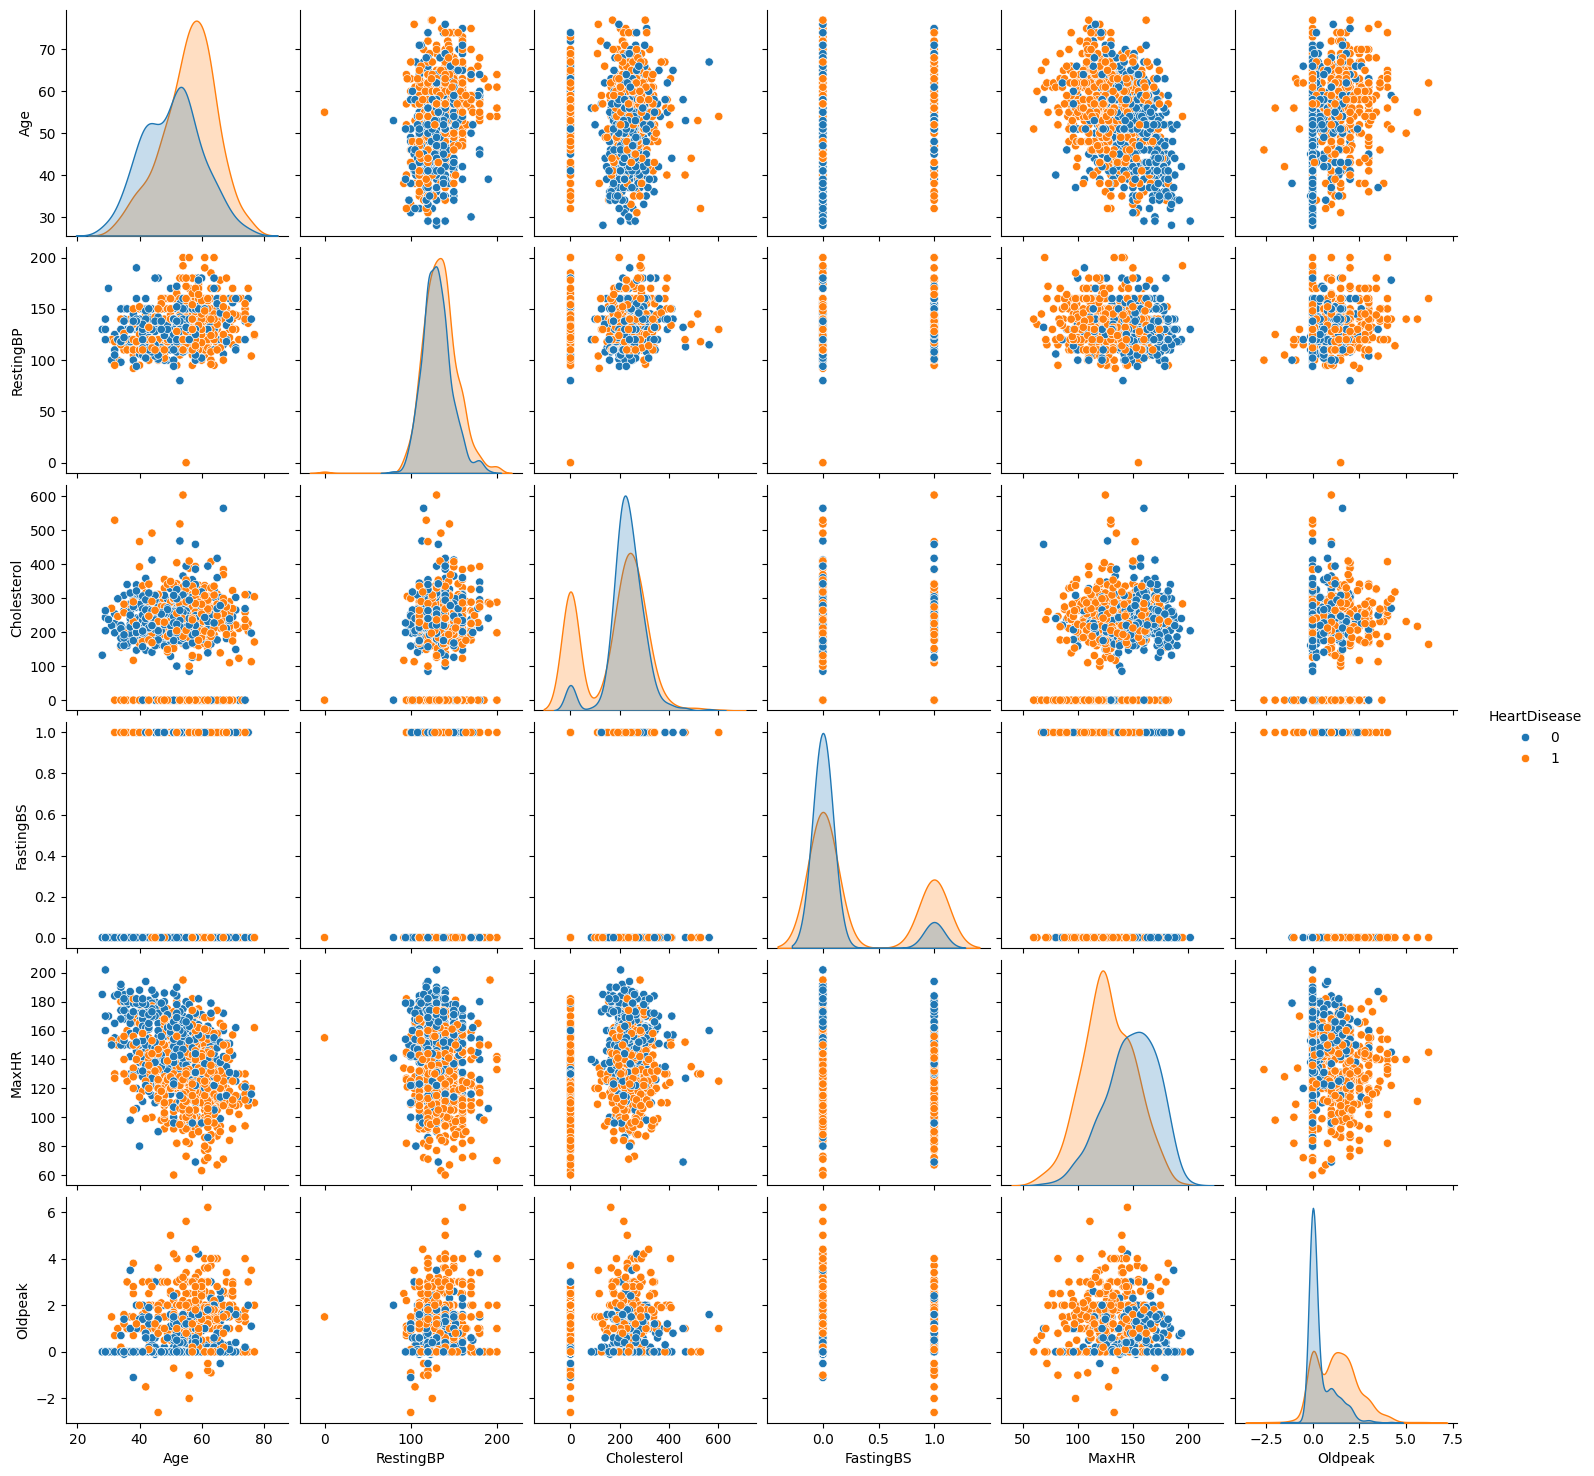

In [44]:
sns.pairplot(df, hue='HeartDisease')
plt.show()

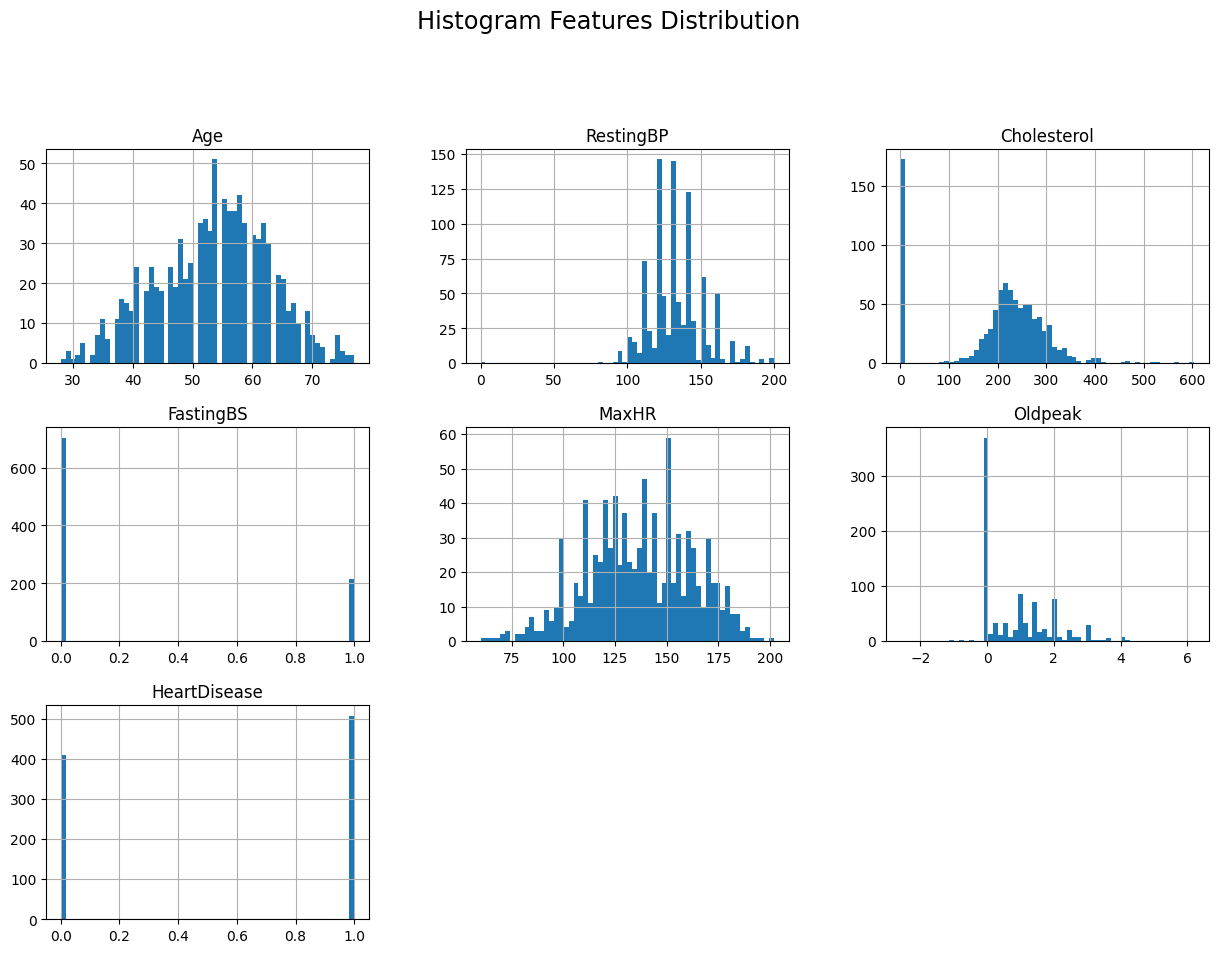

In [45]:
# Histrogram features distribution
df.hist(figsize=(15,10), bins=60)
plt.suptitle('Histogram Features Distribution', x=0.5, y=1.02, ha='center', fontsize='xx-large')
plt.show()

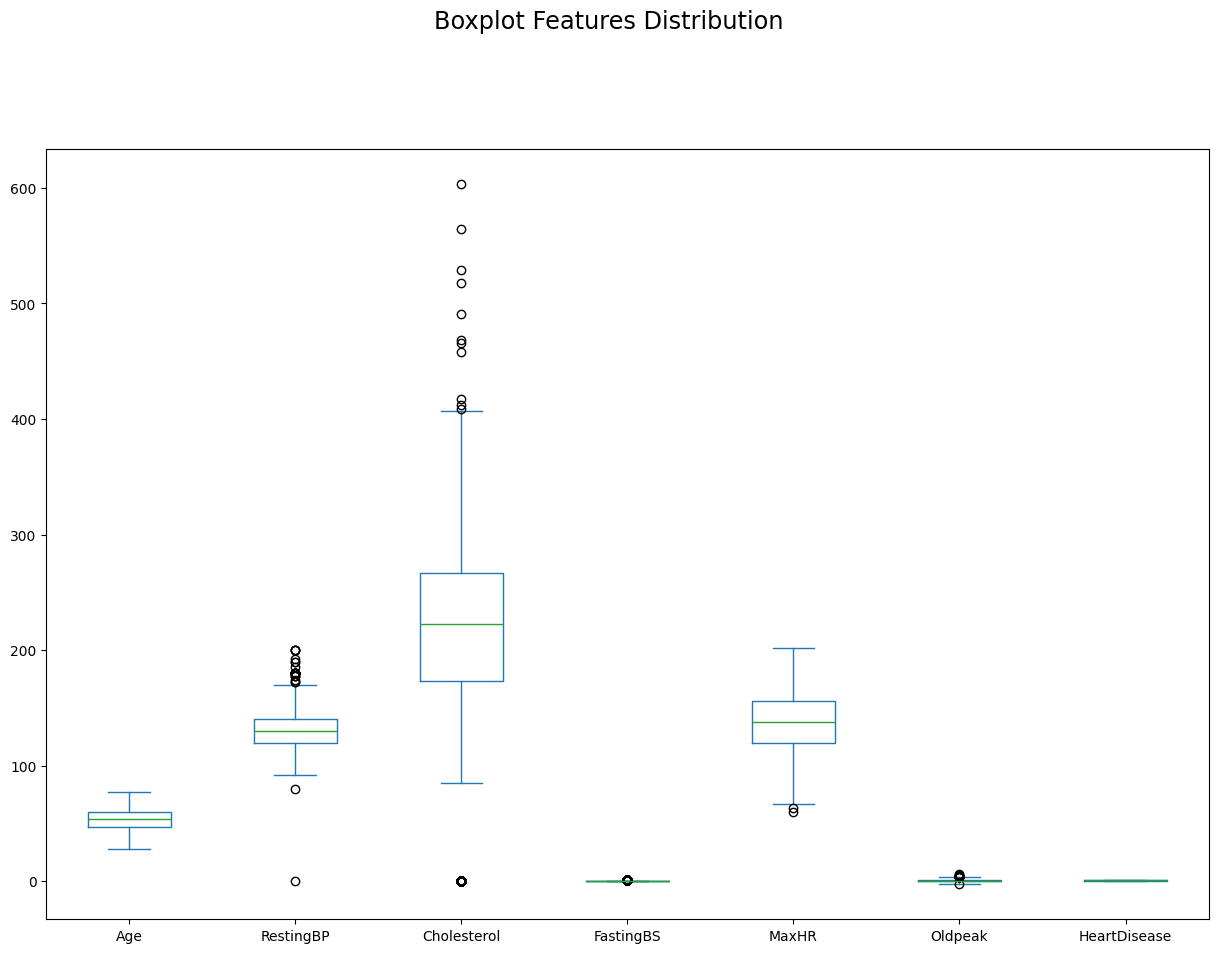

In [46]:
# Boxplot features distribution
df.plot(kind='box', figsize=(15,10))
plt.suptitle('Boxplot Features Distribution', x=0.5, y=1.02, ha='center', fontsize='xx-large')
plt.show()

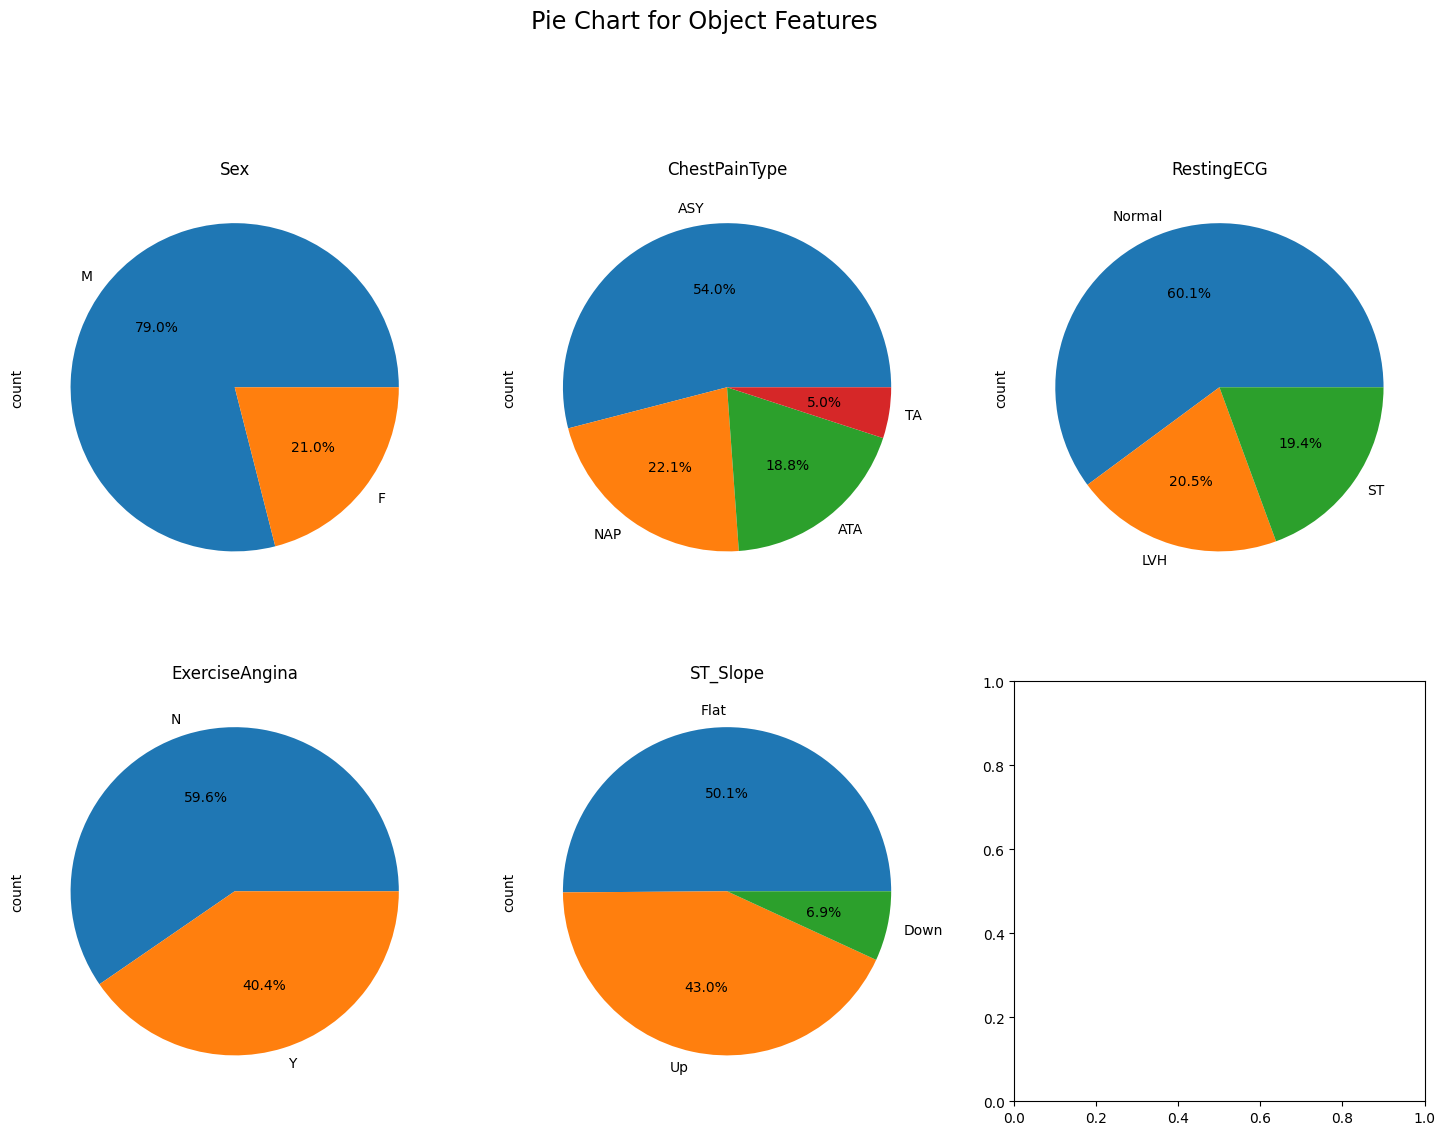

In [47]:
# Pie chart for the features that have the object data type using subplots
object_columns = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i, j in zip(object_columns, axes):
    df[i].value_counts().plot.pie(autopct='%1.1f%%', ax=j)
    j.set_title(i)
plt.suptitle('Pie Chart for Object Features', x=0.5, y=1.02, ha='center', fontsize='xx-large')
plt.show()

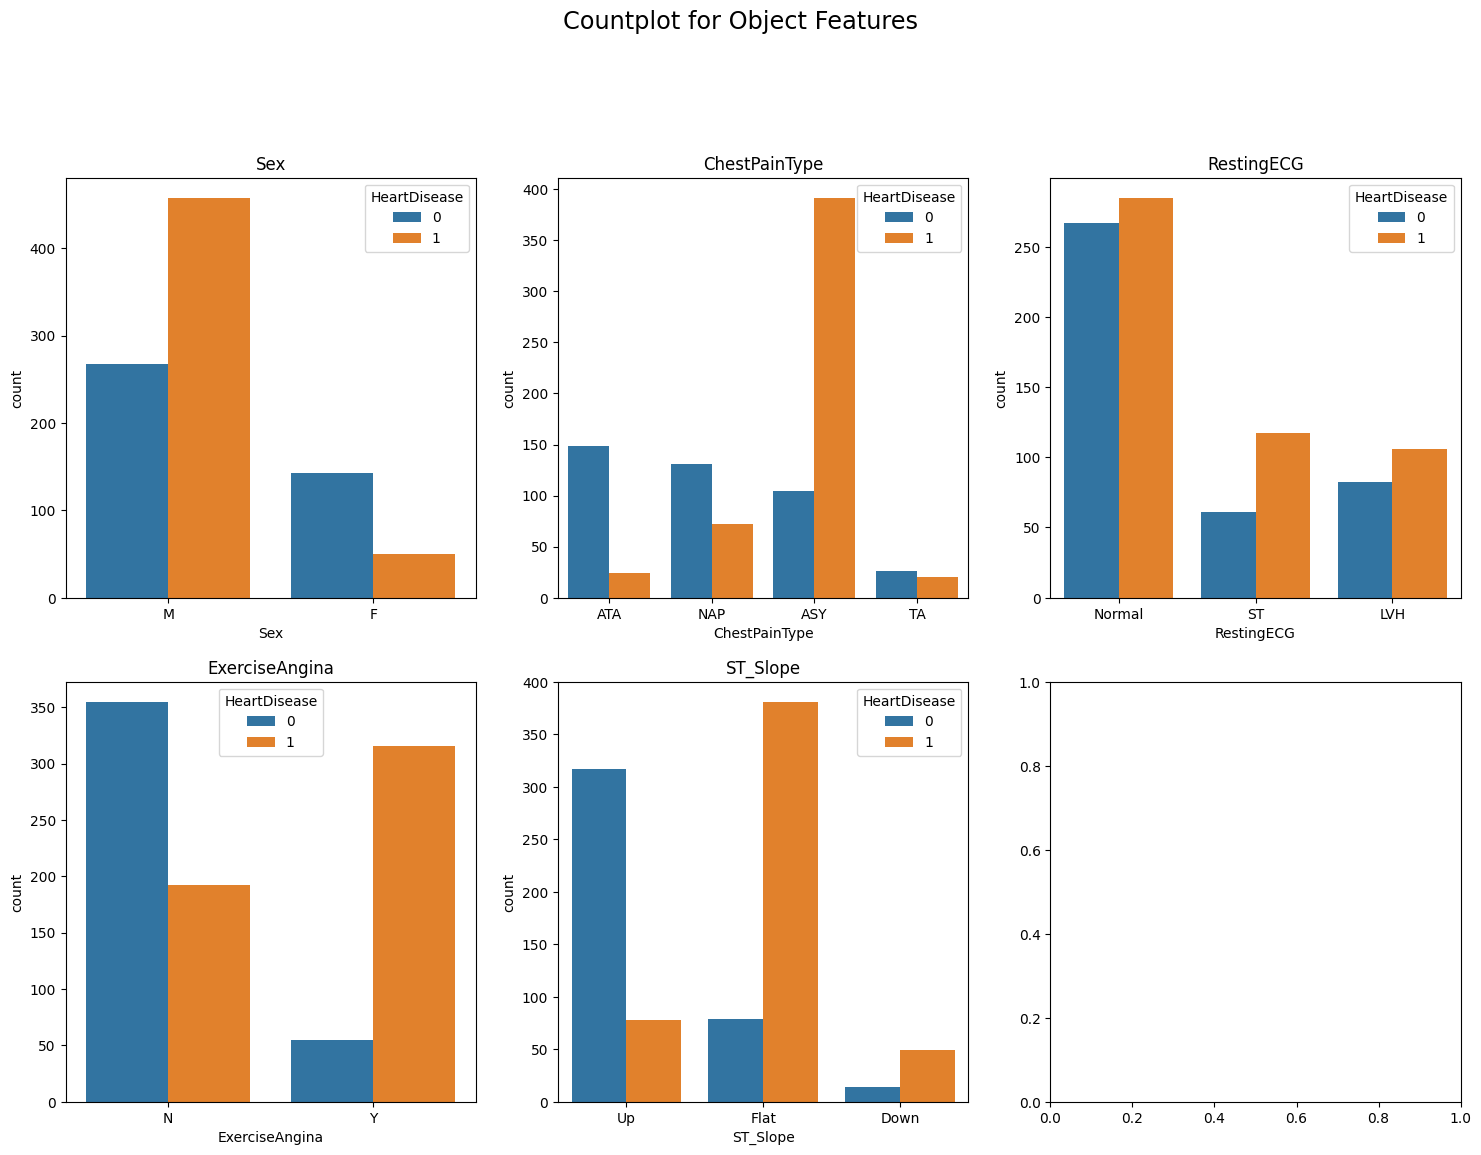

In [48]:
# Countplot for the features that have the object data type using subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i, j in zip(object_columns, axes):
    sns.countplot(x=i, data=df, ax=j, hue='HeartDisease')
    j.set_title(i)
plt.suptitle('Countplot for Object Features', x=0.5, y=1.02, ha='center', fontsize='xx-large')
plt.show()

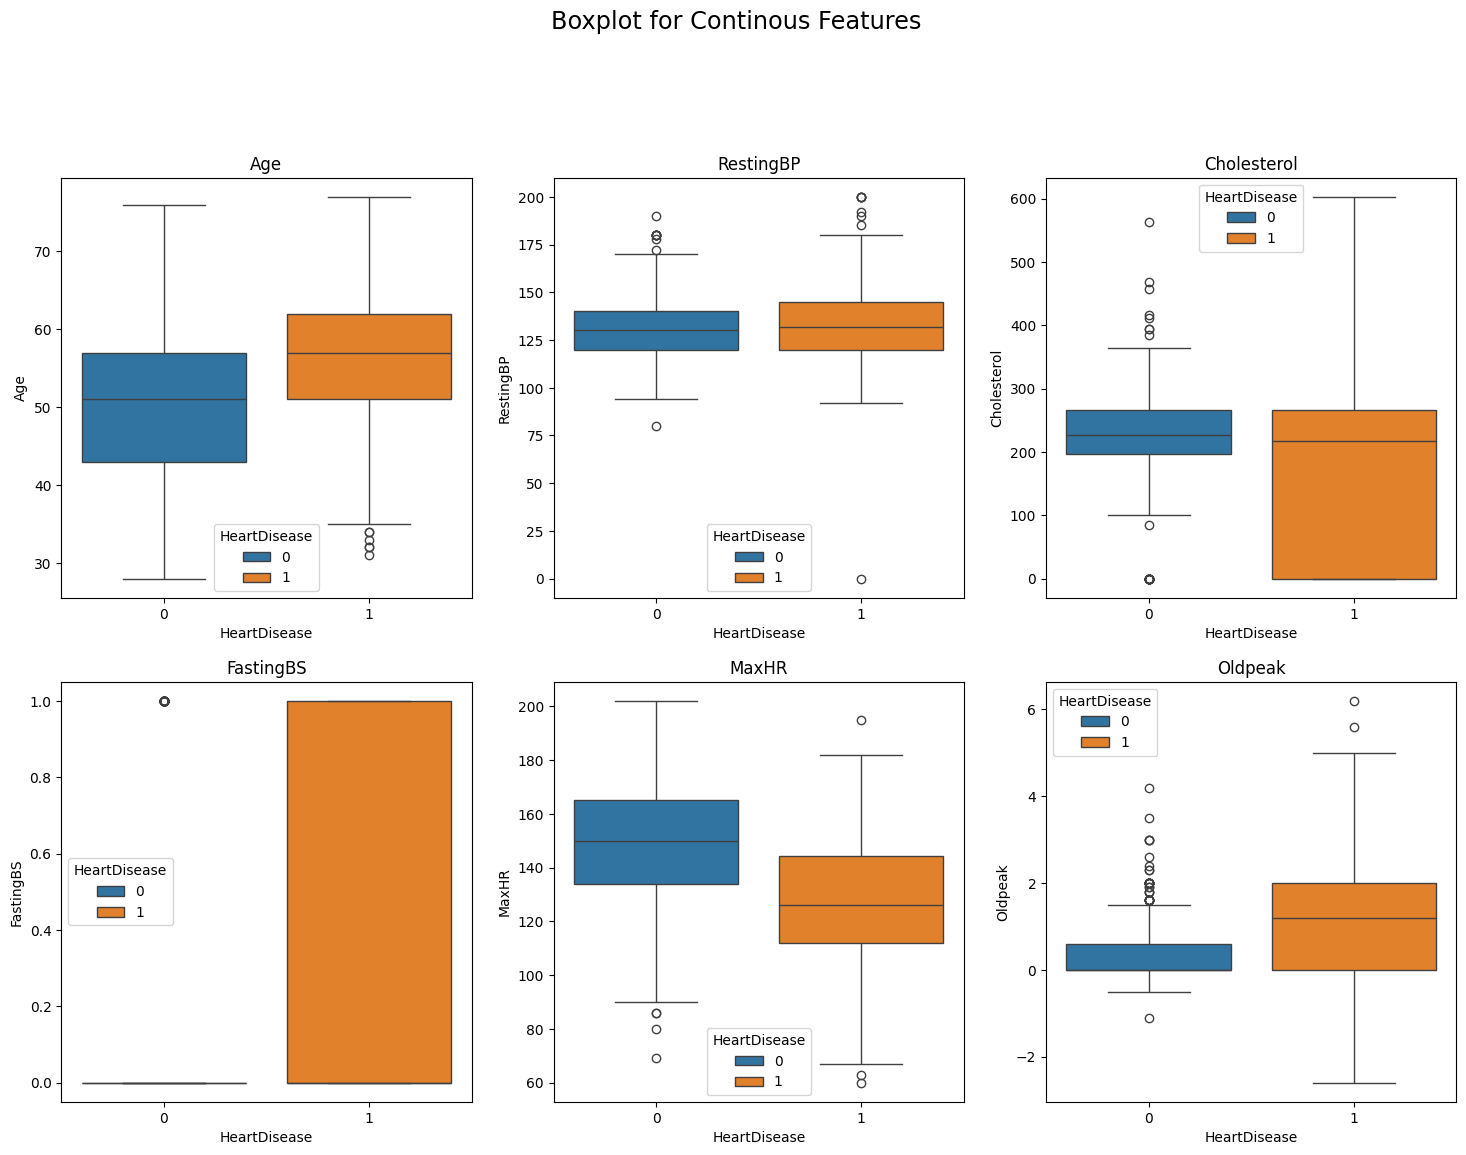

In [49]:
# Boxplot for the features that have the continous values using subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i, j in zip(df.select_dtypes(include=['int64', 'float64']).columns, axes):
    sns.boxplot(x='HeartDisease', y=i, data=df, ax=j, hue='HeartDisease')
    j.set_title(i)
plt.suptitle('Boxplot for Continous Features', x=0.5, y=1.02, ha='center', fontsize='xx-large')
plt.show()

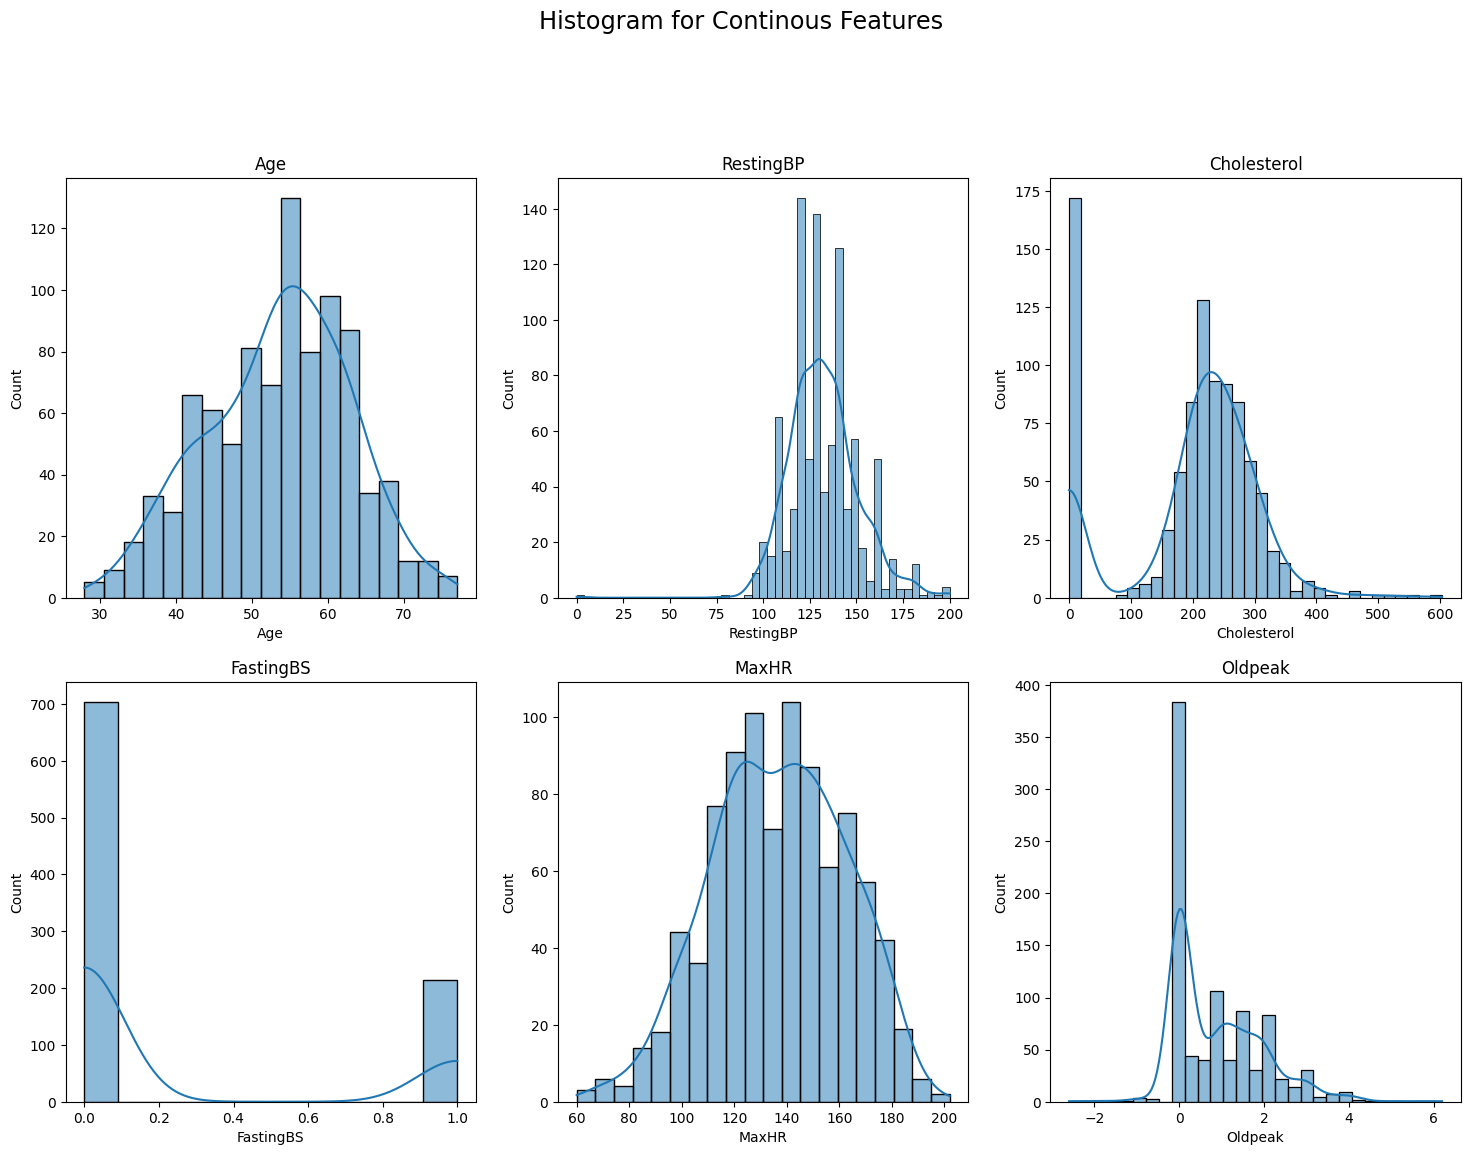

In [50]:
# Histogram for the features that have the continous values using subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i, j in zip(df.select_dtypes(include=['int64', 'float64']).columns, axes):
    sns.histplot(data=df, x=i, kde=True, ax=j)
    j.set_title(i)
plt.suptitle('Histogram for Continous Features', x=0.5, y=1.02, ha='center', fontsize='xx-large')
plt.show()

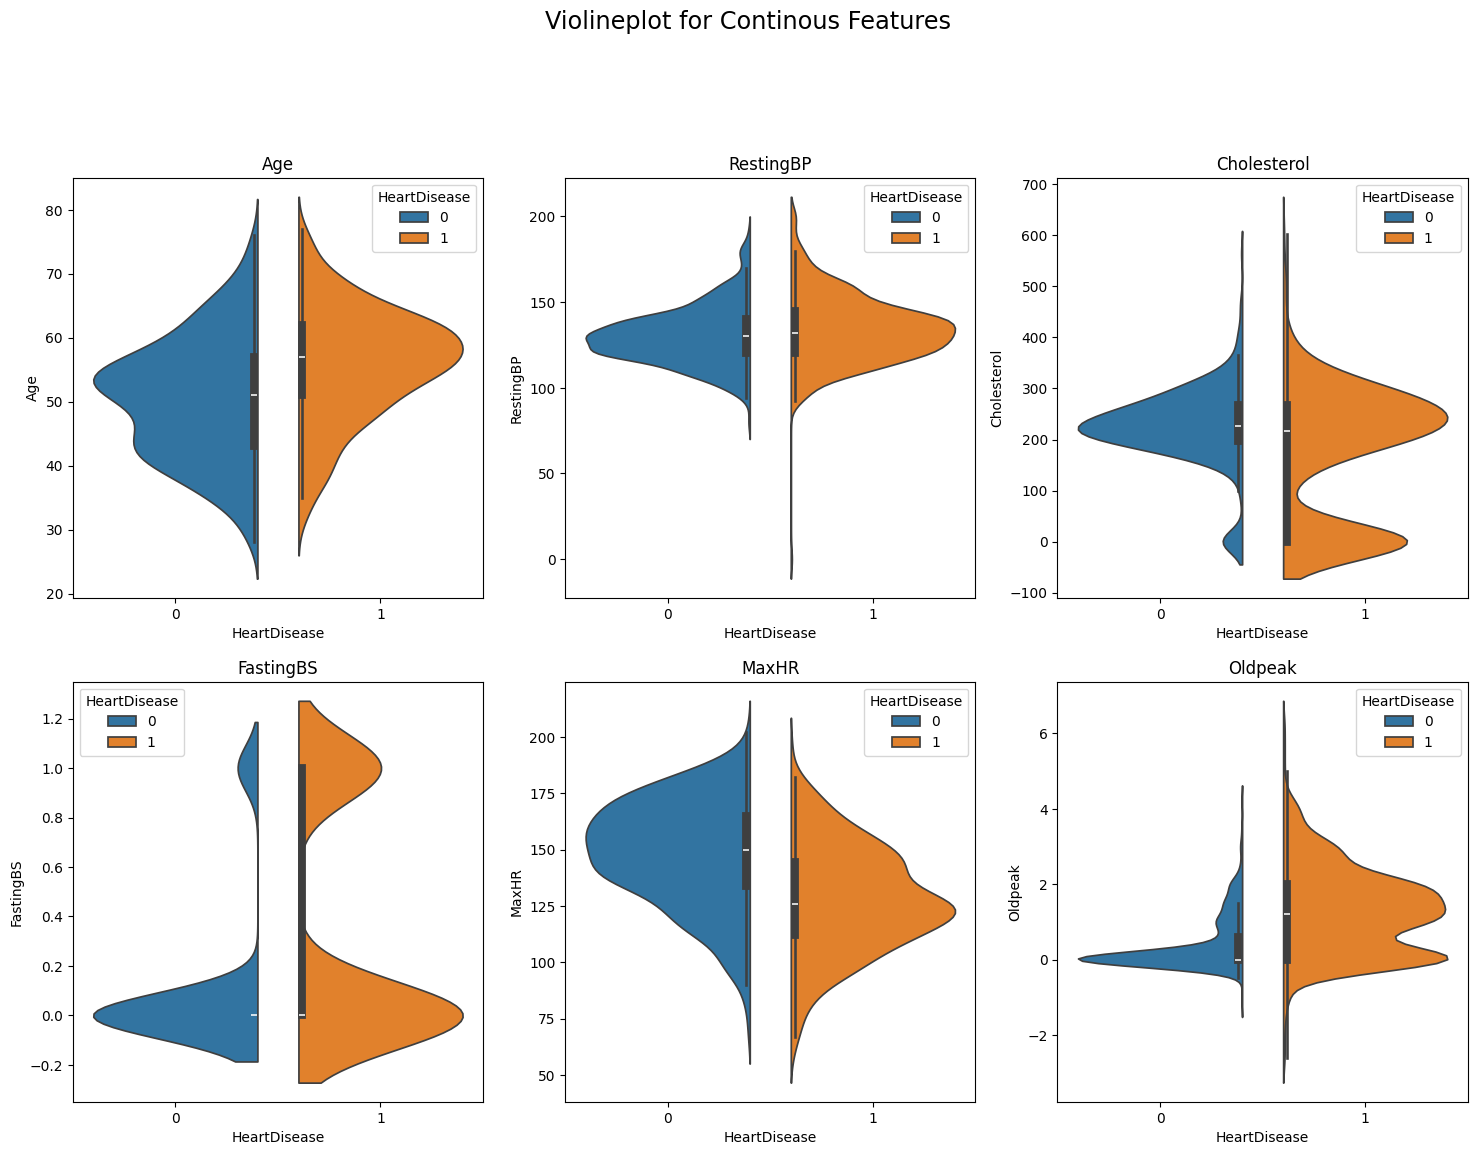

In [51]:
# Violinplot for the features that have the continous values using subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i, j in zip(df.select_dtypes(include=['int64', 'float64']).columns, axes):
    sns.violinplot(x='HeartDisease', y=i, data=df, ax=j, split=True, hue='HeartDisease')
    j.set_title(i)
plt.suptitle('Violineplot for Continous Features', x=0.5, y=1.02, ha='center', fontsize='xx-large')
plt.show()

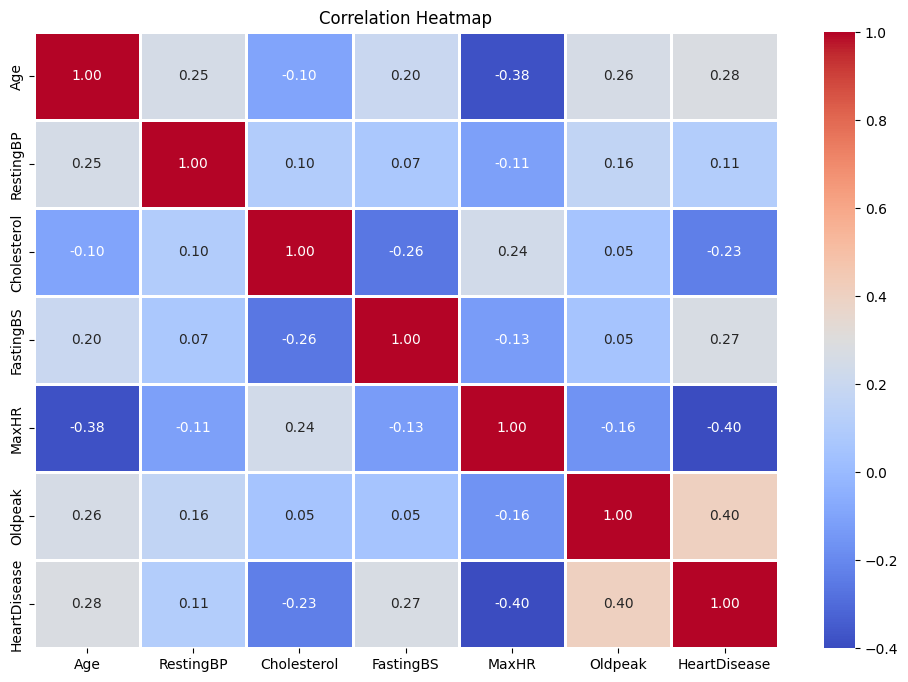

In [52]:
# Correlation heatmap
df_corr = df.drop(df.select_dtypes(include=['object']), axis=1)
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

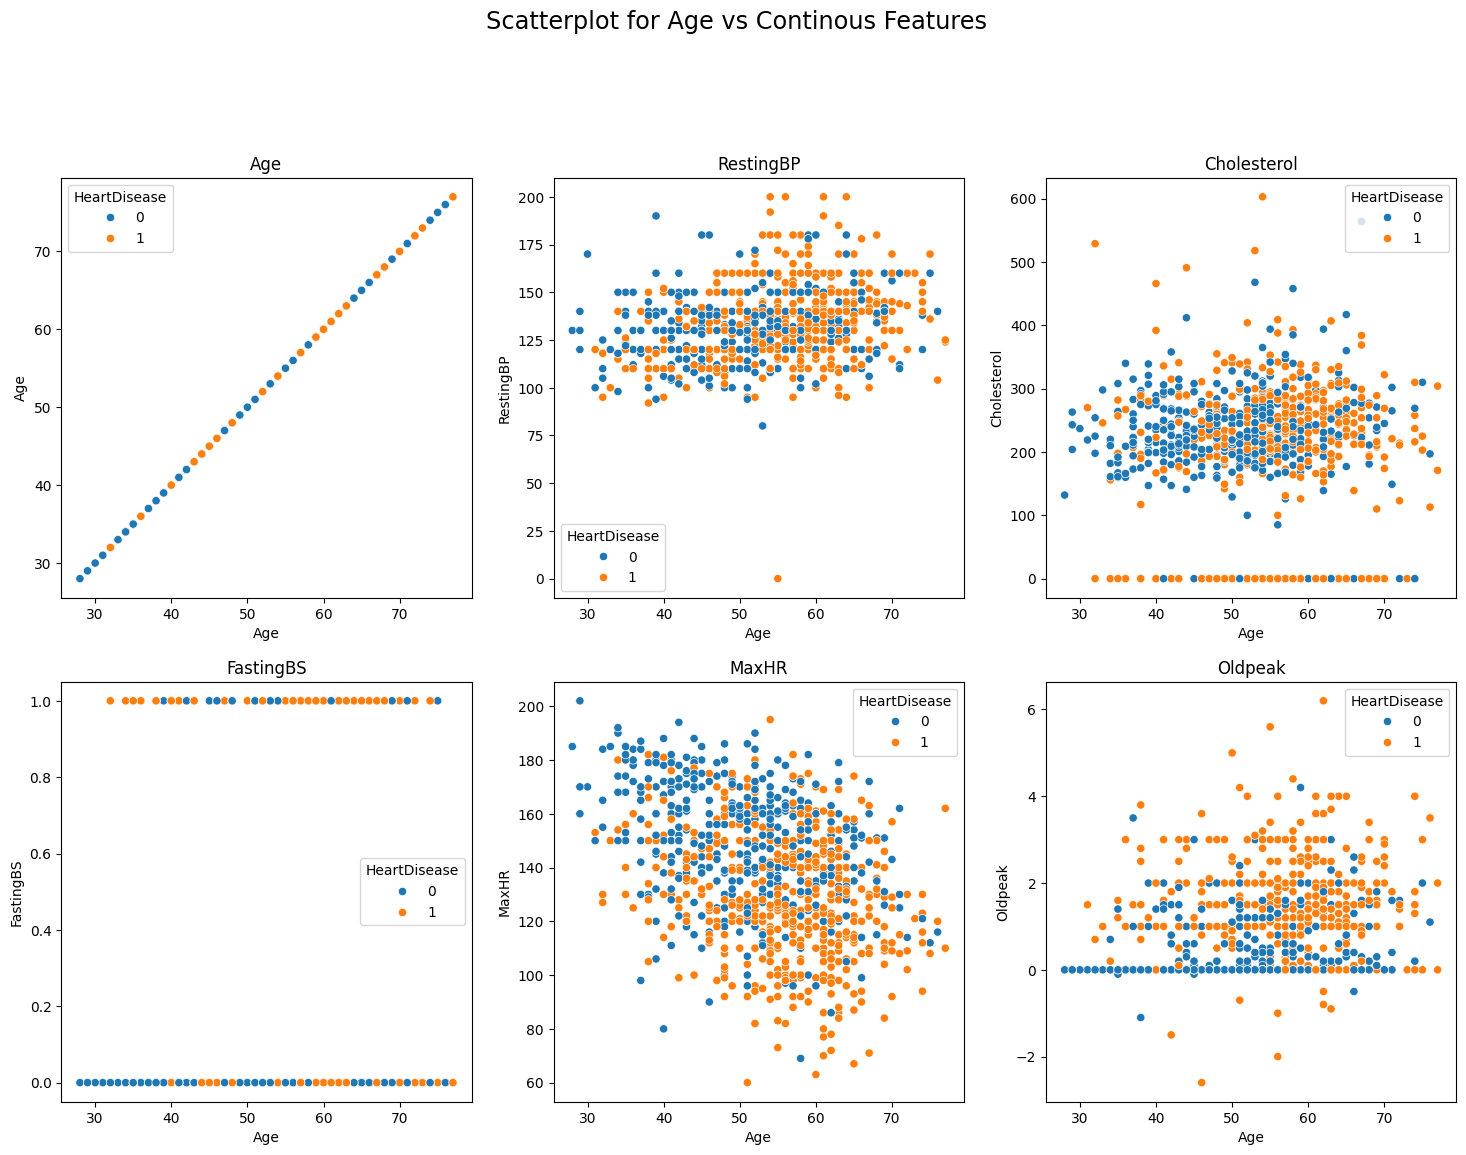

In [53]:
# scatterplot for the Age feature vs features that have the continous values using subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i, j in zip(df.select_dtypes(include=['int64', 'float64']).columns, axes):
    sns.scatterplot(x='Age', y=i, data=df, ax=j, hue='HeartDisease')
    j.set_title(i)
plt.suptitle('Scatterplot for Age vs Continous Features', x=0.5, y=1.02, ha='center', fontsize='xx-large')
plt.show()

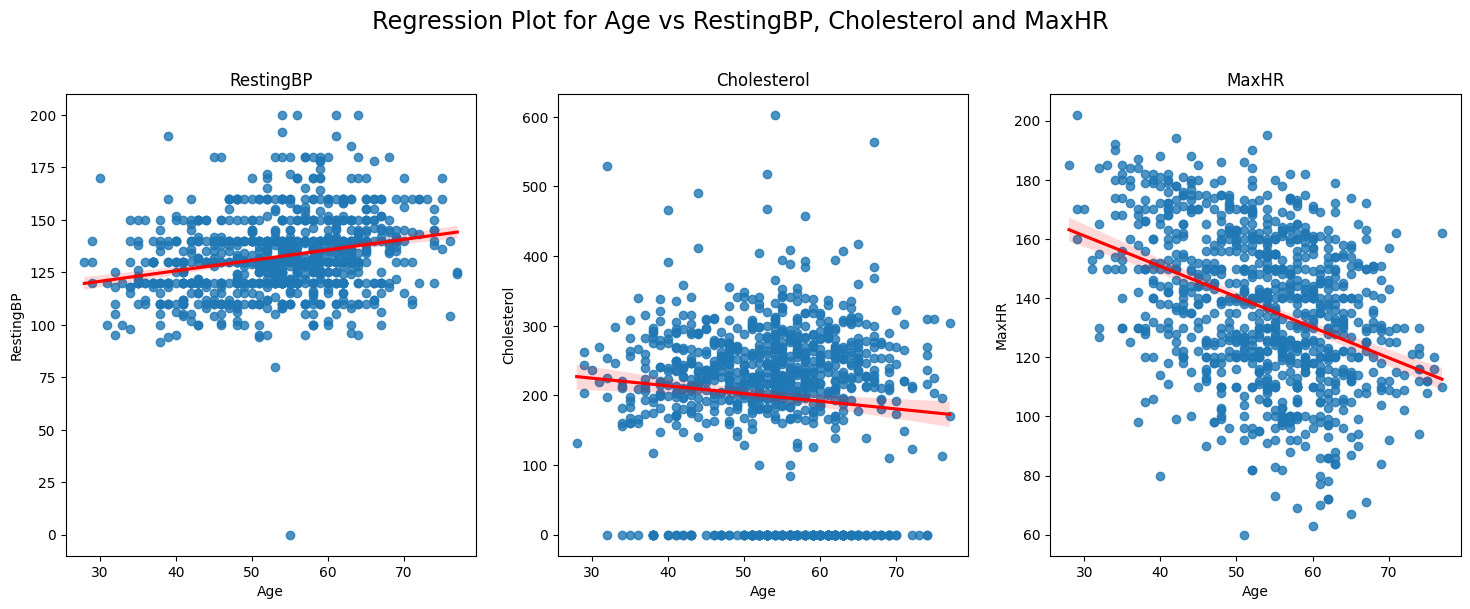

In [54]:
# regresion plot for the Age feature vs features 'RestingBP', 'Cholesterol' and 'MaxHR'
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, j in zip(['RestingBP', 'Cholesterol', 'MaxHR'], axes):
    sns.regplot(x='Age', y=i, data=df, ax=j, line_kws={'color':'red'})
    j.set_title(i)
plt.suptitle('Regression Plot for Age vs RestingBP, Cholesterol and MaxHR', x=0.5, y=1.02, ha='center', fontsize='xx-large')
plt.show()

### 4. Feature Engineering

In [55]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [56]:
# number of categorical and numerical features
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(f'Number of Categorical Features: {len(categorical_features)}')
print(f'Number of Numerical Features: {len(numerical_features)}')

Number of Categorical Features: 5
Number of Numerical Features: 7


In [58]:
# number of unique values in each categorical feature
for i in categorical_features:
    print(f'{i}: {df[i].nunique()}')

Sex: 2
ChestPainType: 4
RestingECG: 3
ExerciseAngina: 2
ST_Slope: 3


In [60]:
# Use LabelEncoder to encode the categorical features which have atmost 3 unique values
label_encoder = LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    if df[i].nunique() <= 3:
        df[i] = label_encoder.fit_transform(df[i])

In [61]:
# Use Frequency Encoding to encode the categorical features which have more than 3 unique values
encoder = ce.CountEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

In [62]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,173,140,289,0,1,172,0,0.0,2,0
1,49,0,203,160,180,0,1,156,0,1.0,1,1
2,37,1,173,130,283,0,2,98,0,0.0,2,0
3,48,0,496,138,214,0,1,108,1,1.5,1,1
4,54,1,203,150,195,0,1,122,0,0.0,2,0


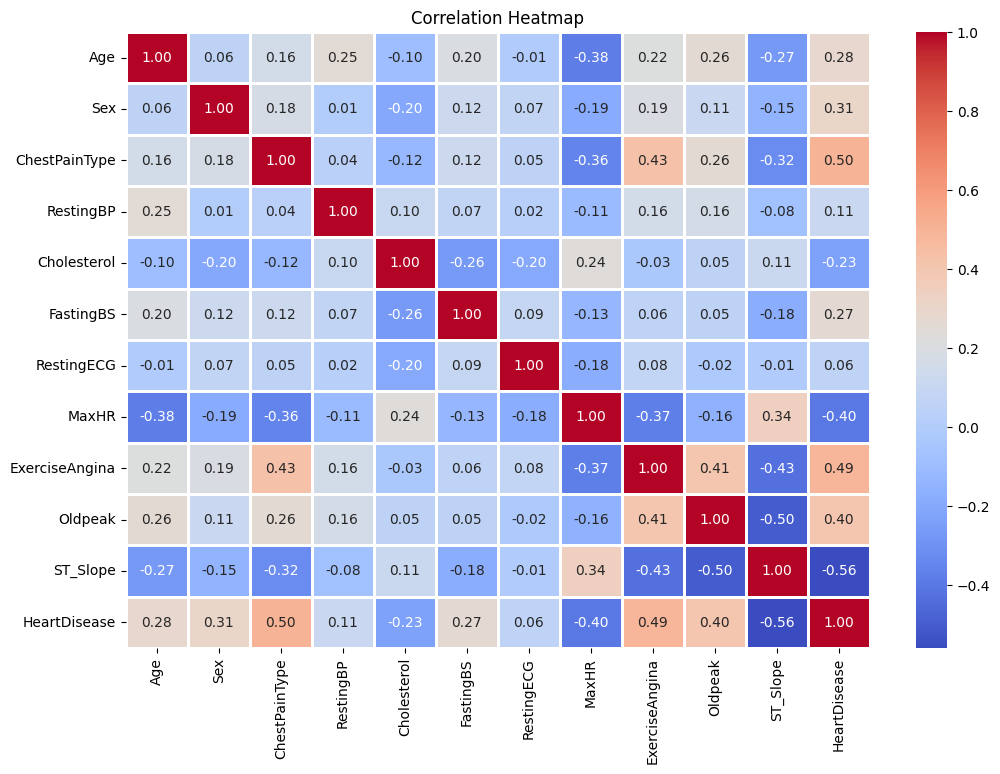

In [63]:
# final correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

### 5. Save Preprocessed Data

In [64]:
df.to_csv('data/heart_preprocessed_data.csv', index=False)